In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from math import *

In [2]:
h = 1e-2 
t_step = 1e-2
L = 1
tmax = 2
#D=0.15
D=1
x = np.arange(-L, L, h)
y = np.arange(-L, L, h)
t = np.arange(0, tmax, t_step)

In [3]:
n = len(x)
print(n)
ux = np.zeros((n,len(t)))
uy = np.zeros((n,len(t)))

200


In [4]:
for yi in range(n):   #u(x,y,0) = (1 − x^2/L^2)(1 − y^2/L^2).
    for xi in range(n):
        u[xi,yi,0] = (1-x[xi]**2/(L)**2)*(1-y[yi]**2/(L)**2)
    ux[yi,0] = (1-y[yi]**2/(L)**2)
    uy[yi,0] = (1-y[yi]**2/(L)**2)


In [5]:
ux = np.zeros((n,len(t)))
uy = np.zeros((n,len(t)))
for i in range(n):
    ux[i,0] = (1-y[i]**2/(L)**2)
    uy[i,0] = (1-y[i]**2/(L)**2)
T_center = np.zeros(n)
T_center[0] = ux[int(n/2),0]*uy[int(n/2),0]
for m in range(0, len(t)-1):
    a = np.zeros(len(x))
    b = np.zeros(len(x))
    c = np.zeros(len(x))
    d = np.zeros(len(x))
    
    a[2:n - 1] = -1/2 * D * t_step/(h**2) # от 2 до n-1
    b[1:n - 1] = 1 + D * t_step/(h**2)
    c[1:n - 2] = -1/2 * D * t_step/(h**2)
    
    if (m % 2) == 0: #du/dt = d2u/d2x
        for j in range(1, n - 1):
            uy[j][m+1] = uy[j][m] + t_step/2 * D * (uy[j+1][m] - 2*uy[j][m] + uy[j-1][m]) /h**2
            d[j] = uy[j][m+1] 
            
        for i in range(2, n):
            k = a[i]/b[i-1] #кси в методичке
            a[i] = 0
            b[i] = b[i] - k * c[i-1]
            d[i] = d[i] - k * d[i-1]
        ux[n - 2][m + 1] = d[n - 2]/b[n - 2]
        for i in range(n - 2, 0, -1):
            ux[i][m + 1] = (1/b[i] * (d[i] - c[i] * ux[i + 1][m + 1]))
        

    elif (m % 2 == 1): #du/dt = d2u/d2y
        for j in range(1, n - 1):
            ux[j][m+1] = ux[j][m] + t_step/2 * D * (ux[j+1][m] - 2*ux[j][m] + ux[j-1][m]) /h**2
            d[j] = ux[j][m+1]

        for i in range(2, n):
            k = a[i]/b[i-1] #кси в методичке
            a[i] = 0
            b[i] = b[i] - k * c[i-1]
            d[i] = d[i] - k * d[i-1]
        uy[n - 2][m + 1] = d[n - 2]/b[n - 2]
        for i in range(n - 2, 0, -1):
            uy[i][m + 1] = (1/b[i] * (d[i] - c[i] * uy[i + 1][m + 1]))


    T_center[m+1]=ux[int(n/2),m+1]*uy[int(n/2),m+1]


1.0
1.0
0.0


(0, 1)

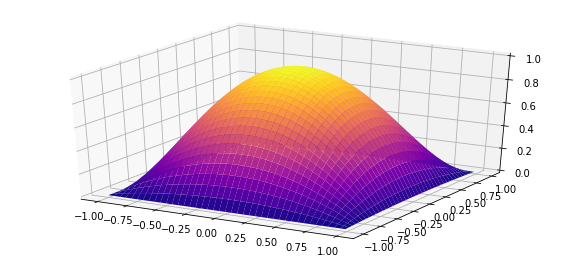

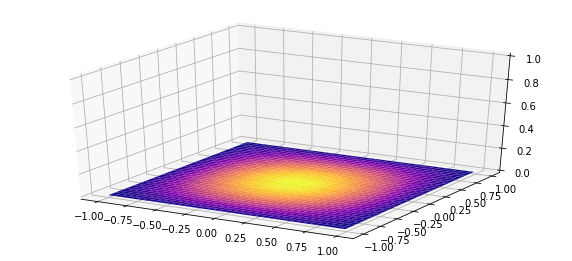

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2, 1, 1, projection = '3d')
xval = np.arange(-L, L, h)
yval = np.arange(-L, L, h)
xv, yv = np.meshgrid(xval, yval)
z = np.zeros((n,n))
for yi in range(n):   #u(x,y,0) = (1 − x^2/L^2)(1 − y^2/L^2).
    for xi in range(n):
        z[xi,yi] = ux[xi,0]*uy[yi,0]
print(z[int(n/2), int(n/2)])
print(T_center[0])
surf = ax.plot_surface(xv, yv, z, rstride = 5, cstride = 5,cmap = cm.plasma)
ax.set_zlim(0,1)

fig = plt.figure(figsize=(10,10))
time = 199
ax = fig.add_subplot(2, 1, 2, projection = '3d')
xval = np.arange(-L, L, h)
yval = np.arange(-L, L, h)
xv, yv = np.meshgrid(xval, yval)
z = np.zeros((n,n))
for yi in range(n):   #u(x,y,0) = (1 − x^2/L^2)(1 − y^2/L^2).
    for xi in range(n):
        z[xi,yi] = ux[xi,time]*uy[yi,time]
#print(z[int(n/2), int(n/2)])
print(z[n-1,time])
surf = ax.plot_surface(xv, yv, z, rstride = 5, cstride = 5,cmap = cm.plasma)
ax.set_zlim(0,1)

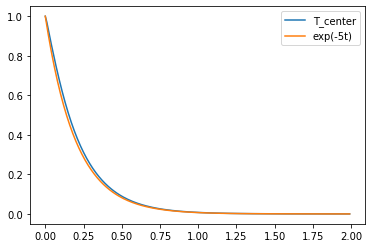

In [9]:
plt.plot(t,T_center,label = "T_center")
plt.plot(t,(np.exp(-5*t)),label = "exp(-5t)")
plt.legend()